## Group 4 
Deep Usdadiya 23PGAI0077<br>
Arpit Tiwari 23PGAI0127<br>
Akash Deshwani 23PGAI0035<br>
Sivaram S 23PGAI0082 <br>

## Data Dictionary

**Extra information about the data**<br>
Hour -> Hour patient stayed in the hospital;<br>
Patientid -> Unique identifier for each patient;<br>

**Vital signs (columns 1-8)** <br>
HR - Heart rate (beats per minute); <br>
O2Sat - Pulse oximetry (%); <br>
Temp - Temperature (Deg C)<br>
SBP - Systolic BP (mm Hg)<br>
MAP - Mean arterial pressure (mm Hg)<br>
DBP - Diastolic BP (mm Hg)<br>
Resp - Respiration rate (breaths per minute)<br>
EtCO2 - End tidal carbon dioxide (mm Hg)<br><br>
**Laboratory values (columns 9-34)**<br>
BaseExcess - Measure of excess bicarbonate (mmol/L)<br>
HCO3 - Bicarbonate (mmol/L)<br>
FiO2 - Fraction of inspired oxygen (%)<br>
pH - N/A<br>
PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)<br>
SaO2 - Oxygen saturation from arterial blood (%)<br>
AST - Aspartate transaminase (IU/L)<br>
BUN - Blood urea nitrogen (mg/dL)<br>
Alkalinephos - Alkaline phosphatase (IU/L)<br>
Calcium - (mg/dL)<br>
Chloride - (mmol/L)<br>
Creatinine - (mg/dL)<br>
Bilirubin_direct - Bilirubin direct (mg/dL)<br>
Glucose - Serum glucose (mg/dL)<br>
Lactate - Lactic acid (mg/dL)<br>
Magnesium - (mmol/dL)<br>
Phosphate - (mg/dL)<br>
Potassium - (mmol/L)<br>
Bilirubin_total - Total bilirubin (mg/dL)<br>
TroponinI - Troponin I (ng/mL)<br>
Hct - Hematocrit (%)<br>
Hgb - Hemoglobin (g/dL)<br>
PTT - partial thromboplastin time (seconds)<br>
WBC - Leukocyte count (count*10^3/µL)<br>
Fibrinogen - (mg/dL)<br>
Platelets - (count*10^3/µL)<br><br>
**Demographics (columns 35-40)**<br>
Age - Years (100 for patients 90 or above)<br>
Gender - Female (0) or Male (1)<br>
Unit1 - Administrative identifier for ICU unit (MICU)<br>
Unit2 - Administrative identifier for ICU unit (SICU)<br>
HospAdmTime - Hours between hospital admit and ICU admit<br>
ICULOS - ICU length-of-stay (hours since ICU admit)<br><br>
**Outcome (column 41)** <br>
SepsisLabel - For sepsis patients, `SepsisLabel` is $1$ if $t≥t_{sepsis}-6$ and $0$ if $t<t_{sepsis}−6$. <br>
For non-sepsis patients, `SepsisLabel` is $0$.

# Libraries to be imported

In [2]:
import os 
import csv
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew
# from pandas_profiling import ProfileReport
# from ipywidgets import HTML, Button, widgets

In [3]:
# Function to convert the .psv files to csv files and returns a dataframe
def psv_to_df (url,turl):

    txt_files = sorted(os.listdir(url))

    to_csv = []
    df2=pd.DataFrame()
    for file in range(0, len(txt_files)):
      path_name = os.path.join(url, txt_files[file])
      to_csv.append(path_name)

    for file in to_csv:
      with open(file) as f:
          df1 = pd.read_csv(f, delimiter='|')
          df1['PatientId']=file
          df2=df2.append([df1])
          
    df2['PatientId'] = df2['PatientId'].str[-11:]
    df2['PatientId'] = df2['PatientId'].str.replace('.psv', '')
    df2['Hour'] = df2.groupby([df2['PatientId']]).cumcount()+1

    df2['pid'] = df2['PatientId'].str[-6:]
    df2 = df2.astype({'pid':'int'})
    
    df2.to_csv(turl, index = False)

    return (df2)


Filepath: Training SetA directory path where all .psv files are kept<br>
Savepath: Path where combined .csv file is to be saved <br>
data_tranform(): function takes in the filepath and savepath as arguments and returns combined dataframe of all .psv files in the filepath <br>
df: Original dataframe

In [4]:
psv_SetA = 'D:\\Study\\AI_DS\\2_Term\\01_Machine_Learning-ShaileshKumar\\Assignment\\ShareProj\\archive\\training_setA\\training'
psv_SetB = 'D:\Study\AI_DS\\2_Term\\01_Machine_Learning-ShaileshKumar\Assignment\ShareProj\\archive\\training_setB\\training_setB'
savePath_SetA = 'D:\\Study\\AI_DS\\2_Term\\01_Machine_Learning-ShaileshKumar\\Assignment\\ShareProj\\archive\\training_setA\\Sepsis_Set_A.csv'
savePath_SetB = 'D:\Study\AI_DS\\2_Term\\01_Machine_Learning-ShaileshKumar\Assignment\ShareProj\\archive\\training_setB\\Sepsis_Set_B.csv'

In [5]:
# df_setA = psv_to_df(psv_SetA,savePath_SetA) ## Comment if already converted
df_setA = pd.read_csv(savePath_SetA) ## Temporarily working on the combined saved dataframe as a csv file
# df_setB = psv_to_df(psv_SetB,savePath_SetB) ## Comment if already converted
df_setB = pd.read_csv(savePath_SetB) ## Temporarily working on the combined saved dataframe as a csv file
## concat df and dftrash into one dataframe
df_combined = pd.concat([df_setA, df_setB], axis=0)

Data validation for files created in the previous step

In [6]:
df_SetApid1 = pd.read_csv('D:\\Study\\AI_DS\\2_Term\\01_Machine_Learning-ShaileshKumar\\Assignment\\ShareProj\\archive\\training_setA\\training\p000001.psv', sep='|')
df_SetApid1.head(2)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0


In [7]:
## df of set A where PatientId is p000001
df_setA[df_setA['PatientId'] == 'p000001'].head(2)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,PatientId,Hour,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.14,0,NaN,NaN,-0.03,1,0,p000001,1,1
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,83.14,0,NaN,NaN,-0.03,2,0,p000001,2,1


In [8]:
df_SetBpidp100001 = pd.read_csv('D:\Study\AI_DS\\2_Term\\01_Machine_Learning-ShaileshKumar\\Assignment\\ShareProj\\archive\\training_setB\\training_setB\\p100001.psv', sep='|')
df_SetBpidp100001.head(2)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,73,1,1,0,-214.64,1,0
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,73,1,1,0,-214.64,2,0


In [9]:
## df of set B where PatientId is p100001
df_setB[df_setB['PatientId'] == 'p100001'].head(2)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,PatientId,Hour,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73,1,1.0,0.0,-214.64,1,0,p100001,1,100001
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,73,1,1.0,0.0,-214.64,2,0,p100001,2,100001


Creating a copy of the original dataframe

In [10]:
dftrash_A = df_setA.copy()
dftrash_B = df_setB.copy()
dftrash_AB = df_combined.copy()

Function for Checking for missing values

In [11]:
def missing_values_report(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns.sort_values(by=['% of Total Values'], ascending=False, inplace=True)

    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns_1 = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns_1.shape[0]) +
            " columns that have missing values.")
    
    mis_val_table_ren_columns['% of Total Values'].plot(figsize=(20,5),kind='bar', title='Missing Values')
    plt.show()

    # Return the col having with less than 90% missing values

    Col_list = list(mis_val_table_ren_columns [mis_val_table_ren_columns ['% of Total Values'] < 90].index)
    
    print("Columns with less than 90% missing values: ", Col_list,'\n\n', "No of columns with less than 90% missing values: ", len(Col_list), end='\n\n')

    return Col_list

In [12]:
def EDA (df):
    pd.set_option("display.max_columns", None)
    pd.set_option("display.max_rows", None)

    print('*********************************')
    
    print('DataFrame Shape: ', df.shape, end='\n\n')

    print('*****************DataFrame Head****************')

    print(df.head(5).T, end='\n\n')

    print('*****************DataFrame Tail****************')

    print(df.tail(5).T, end='\n\n')

    print('*****************DataFrame Info*****************')

    print(df.info(), end='\n\n')

    ## count sepsis label and plot it with bar chart and mark the sepsis label
    print('*****************Sepsis Label Count*****************')

    print(df['SepsisLabel'].value_counts(), end='\n\n')

    print('*****************Sepsis Label Count Plot*****************')

    df['SepsisLabel'].value_counts().plot(kind='bar', title='Count (SepsisLabel)')
    plt.show()

    print('*****************Missing *****************')
    Col_list = missing_values_report(df)

    print('*****************Column Required for analysis *****************')

    Req_col = ['Platelets','Bilirubin_total','Creatinine']

    print("Columns for feature engineering: ",Req_col, end='\n\n')

    print('*****************Concat both Col having with less than 90% missing values and Required Columns *****************')
    
    df_SelCol = pd.concat([df[Req_col], df[Col_list]], axis=1)
    # print('*** Concat done ***', end='\n\n')
    
    print("List of all columns",df_SelCol.columns, "\n\n Total no. of all columns : ", len(Col_list), end='\n\n')

    return (df_SelCol)

# Imputing missing values

In [13]:
def nordistribution_of_imputedf(df):
    df = np.random.normal(10, 3, 1000) #Generating data randomly from a normal distribution.

    sb.set_style("whitegrid")  # Setting style(Optional)
    plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
    sb.distplot(x = df  ,  bins = 10 , kde = True , color = 'teal'\
                , kde_kws=dict(linewidth = 4 , color = 'black'))
    plt.show()

    print('Skew:',skew(df), end='\n\n')
    print('Kurtosis:', kurtosis(df), end='\n\n')
    print('Std.:',df.std(), end= '\n\n')
    print('Mean:',df.mean(), end='\n\n')

    score = {'skew': skew(df), 'kurtosis': kurtosis(df), 'Std.': df.std(), 'Mean': df.mean()}
  
    return (score)

Here how the HR column looks like before imputing missing values

<AxesSubplot:>

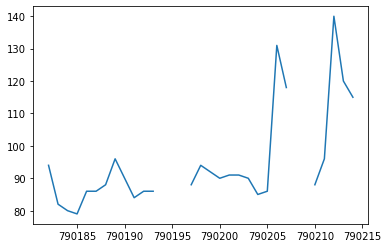

In [14]:
one = dftrash_A.loc[dftrash_A['PatientId'] == 'p020643']
one["HR"].plot()

### Method 1: Imputing missing values with 0

In [15]:
## copy the dataframe
impute_df_0 = dftrash_A.copy()
impute_df_0 = impute_df_0.fillna(0)

<AxesSubplot:>

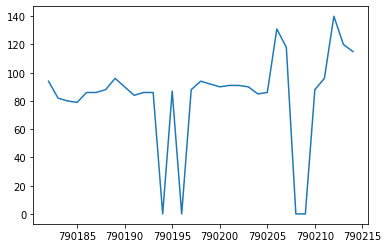

In [16]:
one = impute_df_0.loc[impute_df_0['PatientId'] == 'p020643']
one["HR"].plot()

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


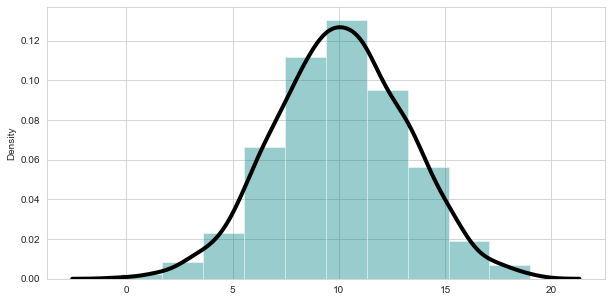

Skew: -0.03060631395705505

Kurtosis: -0.07410321641390238

Std.: 3.062033190513005

Mean: 10.098610590915424



In [17]:
## call the function to get the list of columns
report_M0 = nordistribution_of_imputedf(impute_df_0)

### Method 2: Interpolate

In [18]:
## copy the dataframe
impute_df_2 = dftrash_A.copy()

In [19]:
impute_df_2 = impute_df_2.groupby(['PatientId']).apply(lambda x: x[impute_df_2.columns].interpolate(method='linear', limit_direction='both'))

<AxesSubplot:>

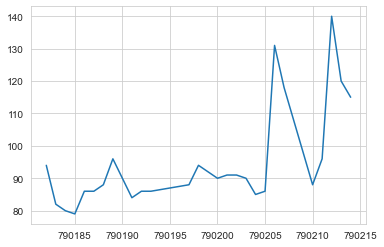

In [20]:
one = impute_df_2.loc[impute_df_2['PatientId'] == 'p020643']
one["HR"].plot()

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


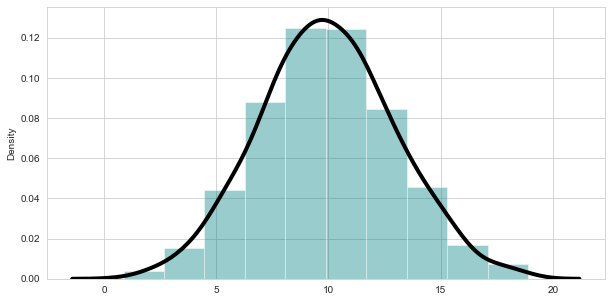

Skew: 0.07900295829776334

Kurtosis: -0.09665449015138172

Std.: 3.033480338715105

Mean: 9.949641317748938



In [21]:
report_M2 = nordistribution_of_imputedf(impute_df_2)

## Method 3: Imputing Mean

In [22]:
## copy the dataframe
impute_df_3 = dftrash_A.copy()

In [23]:
mean_dict = impute_df_3.mean().to_dict()  

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [24]:
def fill_missing(data_frame):
    result = pd.DataFrame()
    for col in data_frame.columns:
        if col in mean_dict:
            result[col] = data_frame[col].fillna(mean_dict[col])
        else:
            result[col] = data_frame[col]
    return result

In [25]:
impute_df_3 = fill_missing(impute_df_3)

<AxesSubplot:>

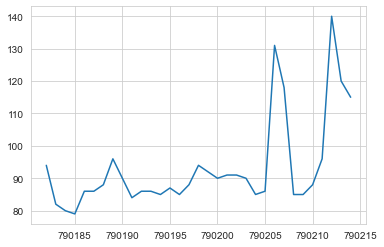

In [26]:
one = impute_df_3.loc[impute_df_3['pid'] == 20643]
one["HR"].plot()

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


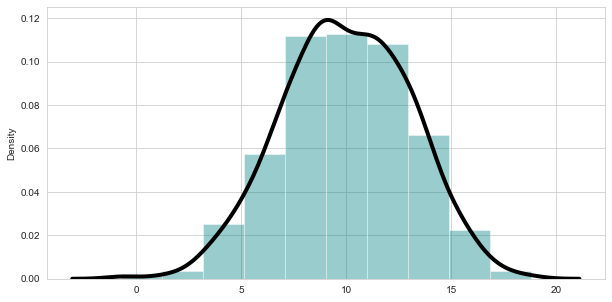

Skew: -0.10338319381079022

Kurtosis: -0.17539450863850803

Std.: 3.058215592354458

Mean: 9.99929135523238



In [27]:
report_M3= nordistribution_of_imputedf(impute_df_3)

## Method 4: Forward Fill

In [28]:
## copy the dataframe
impute_df_4 = dftrash_A.copy()

In [29]:
impute_df_4 = impute_df_4.groupby('PatientId', group_keys=True)
impute_df_4 = impute_df_4.apply(lambda x: x.ffill().reset_index(drop=True))
impute_df_4 = impute_df_4.apply(lambda x: x.bfill().reset_index(drop=True))

<AxesSubplot:>

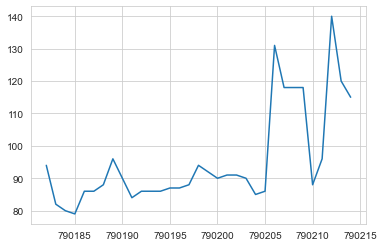

In [30]:
one = impute_df_4.loc[impute_df_4['PatientId'] == 'p020643']
one["HR"].plot()

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


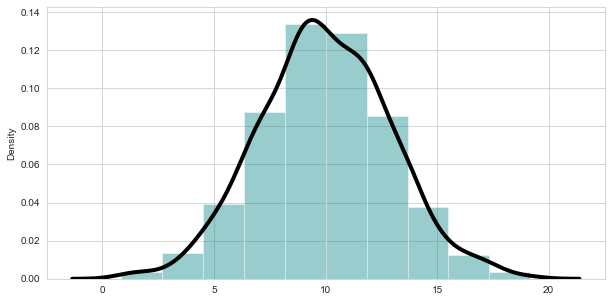

Skew: 0.03029149930971734

Kurtosis: 0.06215871453234634

Std.: 2.9235441821820696

Mean: 9.958326588083315



In [31]:
report_M4 = nordistribution_of_imputedf(impute_df_4)

In [32]:
print ('Method 0: ', report_M0, end='\n\n')
print ('Method 2: ', report_M2, end='\n\n')
print ('Method 3: ', report_M3, end='\n\n')
print ('Method 4: ', report_M4, end='\n\n')

Method 0:  {'skew': -0.03060631395705505, 'kurtosis': -0.07410321641390238, 'Std.': 3.062033190513005, 'Mean': 10.098610590915424}

Method 2:  {'skew': 0.07900295829776334, 'kurtosis': -0.09665449015138172, 'Std.': 3.033480338715105, 'Mean': 9.949641317748938}

Method 3:  {'skew': -0.10338319381079022, 'kurtosis': -0.17539450863850803, 'Std.': 3.058215592354458, 'Mean': 9.99929135523238}

Method 4:  {'skew': 0.03029149930971734, 'kurtosis': 0.06215871453234634, 'Std.': 2.9235441821820696, 'Mean': 9.958326588083315}



Method 2 (Interpolation )and 4 (forward and backward filling ) are giving the best results

In [33]:
def Impute_fwdbwd(data_frame):
    grouped_df = data_frame.groupby('PatientId', group_keys=True)
    imputed_df = grouped_df.apply(lambda x: x.ffill().reset_index(drop=True))
    imputed_df = imputed_df.apply(lambda x: x.bfill().reset_index(drop=True))
    return imputed_df

In [34]:
def Impute_interpolation(data_frame):
    inputed_df = data_frame.groupby(['PatientId']).apply(lambda x: x[data_frame.columns].interpolate(method='linear', limit_direction='both'))
    return inputed_df

# Feature Engineering

## Age

Categorizing patient based on age to  infant/child, adult and elderly respectively 1, 2, 3 <br>
Converting the Age column data of values in the range 0-3, 3-60, 60-max as 'Infant', 'Child/Adult', 'Elderly' respectively

In [35]:
def fe_age(df_raw):
    new_Age = pd.cut(df_raw.Age,bins=[0,3,60,df_raw['Age'].max()], labels = ['1','2','3'])
    df_raw['Age_M'] = new_Age
    # df_raw['Age_M'] = df_raw['Age_M'].astype('int')
    return df_raw

## Heart Rate

Hear rate for a healthy adult is between 60 and 100. For healthy infant it is between 70 and 100. Creating a new column 'HR_M' which is 2 (abnormal) and 1 (normal) based on the age of the patient.

In [36]:
def fe_HR(df_raw):
    df_raw.loc[(df_raw['HR'] >= 60) & (df_raw['HR'] <100) & (df_raw['Age']>10),'HR_M'] = 1 # Normal
    df_raw.loc[(df_raw['HR'] >= 70) & (df_raw['HR'] <110) & (df_raw['Age']<10),'HR_M'] = 1 # Normal
    df_raw.loc[(df_raw['HR'] < 60) & (df_raw['HR'] >100) & (df_raw['Age']>10),'HR_M'] = 2 # Abnormal
    df_raw.loc[(df_raw['HR'] < 70) & (df_raw['HR'] >110) & (df_raw['Age']<10),'HR_M'] = 2 # Abnormal
    
    # df_raw['HR_M'] = df_raw['HR_M'].astype('int')
    return df_raw
    

## Temperature

Temperature for a healthy human being is between 36.4 degree C to 37.6 degree C. Creating a new column 'Temp_M' which is 2 (abnormal) and 1 (normal) based on the age of the patient.

In [37]:
def fe_temp(df_raw):
    df_raw.loc[(df_raw['Temp'] >= 36.4) & (df_raw['Temp'] <=37.6),'Temp_M'] = 1 # Normal
    df_raw.loc[(df_raw['Temp'] < 36.4) | (df_raw['Temp'] >37.6),'Temp_M'] = 2 # Abnormal

    # df_raw['Temp_M'] = df_raw['Temp_M'].astype('int')
    return df_raw
    

## O2Sat

O2Sat for a healthy human being is between 95 and 100. Creating a new column 'O2Sat_M' which is 2 (abnormal) and 1 (normal) based on the age of the patient.

In [38]:
#Converting the O2Sat column data of values in the range 20.0-95.0, 95.1-100.0, 100.1-105.0 as 1,2,3 respectively
def fe_O2Sat(df_raw):
    new_O2Sat = pd.cut(df_raw.O2Sat,bins=[df_raw['O2Sat'].min(),95.0,99.9, df_raw['O2Sat'].max()], labels = ['1','2','1'], ordered= False)
    df_raw['O2Sat_M'] = new_O2Sat

    # df_raw['O2Sat_M'] = df_raw['O2Sat_M'].astype('int')
    return df_raw
    

## Mean Arterial Pressure (MAP)

In [39]:
def fe_map (df_raw):
    df_raw.loc[(df_raw['MAP'].between(70,100)), 'M_MAP'] = '1'
    df_raw.loc[(df_raw['MAP'] < 70), 'M_MAP'] = '2'
    df_raw.loc[(df_raw['MAP'] > 100), 'M_MAP'] = '2'

    # df_raw['M_MAP'] = df_raw['M_MAP'].astype('int')
    return df_raw
    

# Derived Features 

## BP (Blood Pressure)

SBP stands for Systolic blood pressure, It is the upper number while measuring Blood pressure. DBP stands for Diastolic blood pressure , It is the lower number while measuring Blood pressure. Using both these columns to categorize blood pressure as low, normal, elevated , high and missing.


BP (SBP and DSP) | Values 
--- | --- 
(SBP > 90 and DBP < 60)| Low -> 1 
(90< SBP < 120 &  60 < DBP < 80 ) |Normal -> 2
(120 < SBP < 140 &  80 < DBP < 90 ) |Elevated -> 3 
( SBP > 140 &  DBP > 90 ) |High -> 4 

#### SBP  (Systolic Blood Pressure)

In [40]:
#Converting the SBP column data of values in the range 22.0-90.0, 90.1-120.0, 120.1-140.0, 140.1-281.0 as 1,2,3,4 respectively
    
def fe_SBP(df_raw):
    new_SBP = pd.cut(df_raw.SBP,bins=[df_raw['SBP'].min(),90.0,120.0,140.0,df_raw['SBP'].max()], labels = ['1','2','3','4'])
    df_raw['SBP_M'] = new_SBP

    # df_raw['SBP_M'] = df_raw['SBP_M'].astype('int')
    return df_raw
    

#### DBP (Diastolic Blood Pressure)

In [41]:
#Converting the SBP column data of values in the range 22.0-90.0, 90.1-120.0, 120.1-140.0, 140.1-281.0 as 1,2,3,4 respectively
def fe_DBP(df_raw):
    new_DBP = pd.cut(df_raw.DBP,bins=[df_raw['DBP'].min(),60.0,80.0,90.0,df_raw['DBP'].max()], labels = ['1','2','3','4'])
    df_raw['DBP_M'] = new_DBP

    # df_raw['DBP_M'] = df_raw['DBP_M'].astype('int')
    return df_raw
    

In [42]:
def dfe_BP(df_raw):
    df_raw.loc[(df_raw['SBP'] <90) & (df_raw['DBP'] <60), 'M_BP'] = '1'

    df_raw.loc[(df_raw['SBP'].between(90,120, inclusive=True)) & 
            (df_raw['DBP'].between(60,80, inclusive=True)), 
            'M_BP'] = '2'

    df_raw.loc[(df_raw['SBP'].between(120,140, inclusive=True)) & 
            (df_raw['DBP'].between(80,90, inclusive=True)), 
            'M_BP'] = '3'

    df_raw.loc[(df_raw['SBP'] > 140 ) & (df_raw['DBP'] > 90 ), 'M_BP'] = '4'
    #df_raw['M_BP'] = df_raw['M_BP'].astype('int')
    return df_raw
    

# Respiration Rate

Age (years) | Normal(1) | Abnormal (2)
--- | --- | ---
Less than year | 30-60 | <30 or >60
1 to 3 year | 24-40| <24 or >40
3 to 6 year | 22-34 | <22 or >34
6 to 12 year | 18-30 | <18 or >30
12 to 18 year | 12-16 | <12 or >16
Greater than 18 year| 12-20 | <12 or >20




In [43]:
def dfe_RR(df_raw):
    df_raw.loc[(df_raw['Resp'].between(30,60)) & (df_raw['Age'] <1), 
            'M_Resp'] = '1'
    df_raw.loc[((df_raw['Resp'] < 30) | (df_raw['Resp'] > 60)) & 
             (df_raw['Age'] <1) ,'M_Resp'] = '2'


    df_raw.loc[(df_raw['Resp'].between(24,40)) & (df_raw['Age'].between(1,3)), 
            'M_Resp'] = '1'
    df_raw.loc[((df_raw['Resp'] < 24) | (df_raw['Resp'] > 40)) & 
             (df_raw['Age'].between(1,3)) ,'M_Resp'] = '2'


    df_raw.loc[(df_raw['Resp'].between(22,34)) & (df_raw['Age'].between(3,6)), 
            'M_Resp'] = '1'
    df_raw.loc[((df_raw['Resp'] < 22) | (df_raw['Resp'] > 34)) & 
             (df_raw['Age'].between(3,6)) ,'M_Resp'] = '2'


    df_raw.loc[(df_raw['Resp'].between(18,30)) & (df_raw['Age'].between(6,12)), 
            'M_Resp'] = '1'
    df_raw.loc[((df_raw['Resp'] < 18) | (df_raw['Resp'] > 30)) & 
             (df_raw['Age'].between(6,12)) ,'M_Resp'] = '2'


    df_raw.loc[(df_raw['Resp'].between(12,20)) & (df_raw['Age'] >12), 
            'M_Resp'] = '1'
    df_raw.loc[((df_raw['Resp'] < 12) | (df_raw['Resp'] > 20)) & (df_raw['Age'] >12),'M_Resp'] = '2'
    #df_raw['M_Resp'] = df_raw['M_Resp'].astype('int')
    return df_raw
    

## MEWS (Modified Early Warning Score)

In [44]:
def dfe_mews_score(df_raw):
    mews = np.zeros(shape=df_raw.shape[0])

    # SBP
    sbp = df_raw['SBP'].values
    mews[sbp <= 70] += 3
    mews[(70 < sbp) & (sbp <= 80)] += 2
    mews[(80 < sbp) & (sbp <= 100)] += 1
    mews[sbp >= 200] += 2

    # HR
    hr = df_raw['HR'].values
    mews[hr < 40] += 2
    mews[(40 < hr) & (hr <= 50)] += 1
    mews[(100 < hr) & (hr <= 110)] += 1
    mews[(110 < hr) & (hr < 130)] += 2
    mews[hr >= 130] += 3

    # Resp
    resp = df_raw['Resp'].values
    mews[resp < 9] += 2
    mews[(15 < resp) & (resp <= 20)] += 1
    mews[(20 < resp) & (resp < 30)] += 2
    mews[resp >= 30] += 3
    df_raw.loc[:, 'MEWS'] = mews

    # df_raw['MEWS'] = df_raw['MEWS'].astype('int')
    return df_raw
    

## SOFA

In [45]:
def dfe_SOFA(df_raw):
    sofa = np.zeros(shape=df_raw.shape[0])

    # Coagulation
    platelets = df_raw['Platelets'].values
    sofa[platelets >= 150] += 0
    sofa[(100 <= platelets) & (platelets < 150)] += 1
    sofa[(50 <= platelets) & (platelets < 100)] += 2
    sofa[(20 <= platelets) & (platelets < 50)] += 3
    sofa[platelets < 20] += 4

    # Liver
    bilirubin = df_raw['Bilirubin_total'].values
    sofa[bilirubin < 1.2] += 0
    sofa[(1.2 <= bilirubin) & (bilirubin <= 1.9)] += 1
    sofa[(1.9 < bilirubin) & (bilirubin <= 5.9)] += 2
    sofa[(5.9 < bilirubin) & (bilirubin <= 11.9)] += 3
    sofa[bilirubin > 11.9] += 4

    # Cardiovascular
    map = df_raw['MAP'].values
    sofa[map >= 70] += 0
    sofa[map < 70] += 1

    # Creatinine
    creatinine = df_raw['Creatinine'].values
    sofa[creatinine < 1.2] += 0
    sofa[(1.2 <= creatinine) & (creatinine <= 1.9)] += 1
    sofa[(1.9 < creatinine) & (creatinine <= 3.4)] += 2
    sofa[(3.4 < creatinine) & (creatinine <= 4.9)] += 3
    sofa[creatinine > 4.9] += 4

    df_raw.loc[:, 'SOFA'] = sofa

    # df_raw['SOFA'] = df_raw['SOFA'].astype('int')
    return df_raw
    

In [46]:
def qsofa_score(df_raw):
    """
    1 point for each of the following:
        RR > 22/min
        SBP <= 100mmHg
        Altered mental status    # Have no way of checking this, needs GCS
    """
    qsofa = pd.DataFrame(index=df_raw.index)
    qsofa['Resp'] = df_raw['Resp'] >= 22
    qsofa['SBP'] = df_raw['SBP'] <= 100
    df_raw.loc[:, 'qSOFA'] = qsofa.sum(axis=1) 
    return df_raw

In [47]:
def septic_shock(df_raw):
    shock = np.zeros(shape=df_raw.shape[0])
    shock[df_raw['MAP'].values < 65] += 1
    shock[df_raw['Lactate'].values < 2] += 1

    df_raw.loc[:, 'Shock'] = shock

    df_raw['Shock'] = df_raw['Shock'].astype('int')
    return df_raw

In [48]:
def features_eng(df):
    df2= fe_age(df)
    df2= fe_HR(df)
    df2= fe_temp(df)
    df2= fe_O2Sat(df)
    df2= fe_map(df)
    df2= fe_SBP(df)
    df2= fe_DBP(df)
    df2= dfe_BP(df)
    df2= dfe_RR(df)
    df2= dfe_mews_score(df)
    df2= dfe_SOFA(df)
    df2= qsofa_score(df)
    df2= septic_shock(df)
    return df2

# Data Building

In [49]:
# Convert categorical columns to numeric 
def convert_cat_and_obj_to_num(df2):

  for col in df2.columns:
    if df2[col].dtype == 'object':
      df2[col] = pd.to_numeric(df2[col], downcast='float')

  for col in df2.columns:
    if df2[col].dtype == 'category':
      df2[col] = pd.to_numeric(df2[col], downcast='float')

  return df2

In [50]:
df_raw_A = dftrash_A.copy()
df_raw_B = dftrash_B.copy()

In [51]:
df_raw_imputed_A_1 = Impute_fwdbwd(df_raw_A)
df_raw_imputed_B_1 = Impute_fwdbwd(df_raw_B)

Your selected dataframe has 44 columns.
There are 6 columns that have missing values.


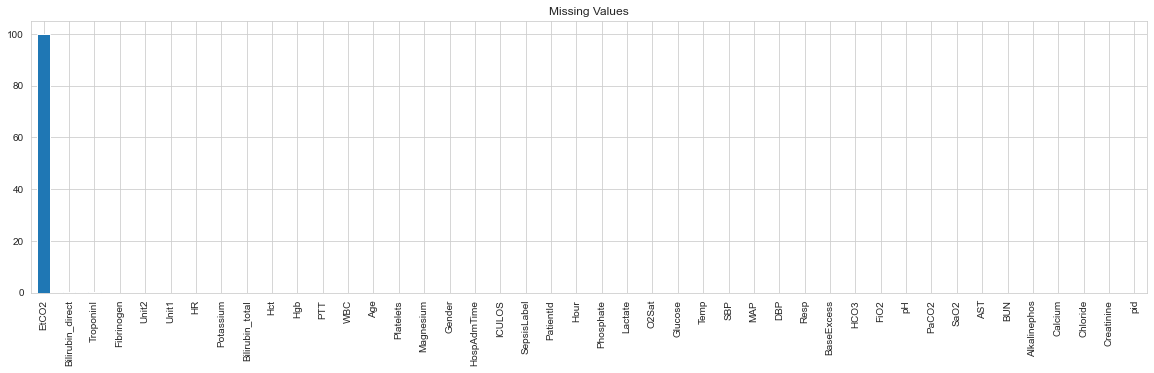

Columns with less than 90% missing values:  ['Bilirubin_direct', 'TroponinI', 'Fibrinogen', 'Unit2', 'Unit1', 'HR', 'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Age', 'Platelets', 'Magnesium', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'PatientId', 'Hour', 'Phosphate', 'Lactate', 'O2Sat', 'Glucose', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'pid'] 

 No of columns with less than 90% missing values:  43



In [52]:
Column_A1 = missing_values_report(df_raw_imputed_A_1)

Your selected dataframe has 44 columns.
There are 13 columns that have missing values.


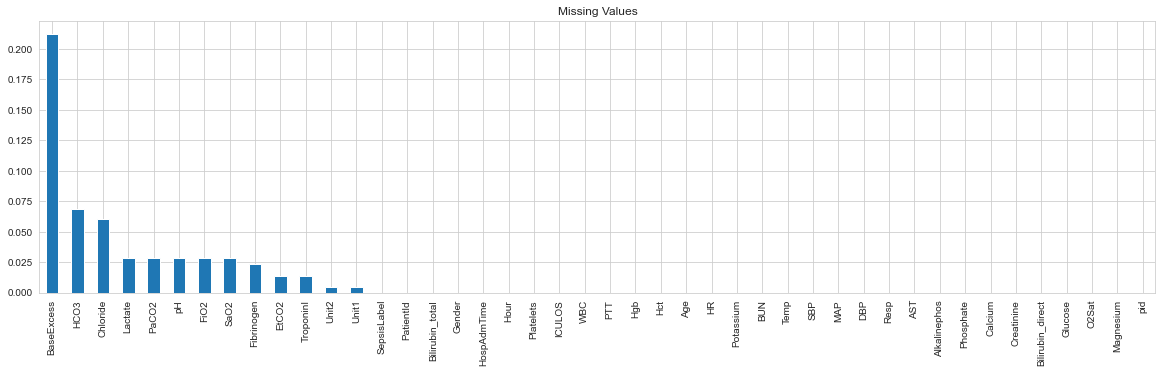

Columns with less than 90% missing values:  ['BaseExcess', 'HCO3', 'Chloride', 'Lactate', 'PaCO2', 'pH', 'FiO2', 'SaO2', 'Fibrinogen', 'EtCO2', 'TroponinI', 'Unit2', 'Unit1', 'SepsisLabel', 'PatientId', 'Bilirubin_total', 'Gender', 'HospAdmTime', 'Hour', 'Platelets', 'ICULOS', 'WBC', 'PTT', 'Hgb', 'Hct', 'Age', 'HR', 'Potassium', 'BUN', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'AST', 'Alkalinephos', 'Phosphate', 'Calcium', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'O2Sat', 'Magnesium', 'pid'] 

 No of columns with less than 90% missing values:  44



In [53]:
Column_B1 = missing_values_report(df_raw_imputed_B_1)

In [54]:
## remove PatientId as it is not a feature
df_raw_imputed_A_1.drop(['PatientId'], axis=1, inplace=True)
df_raw_imputed_B_1.drop(['PatientId'], axis=1, inplace=True)

In [55]:
## remove EtCO2 as it is 100 % missing
df_raw_imputed_A_1.drop(['EtCO2'], axis=1, inplace=True)
df_raw_imputed_B_1.drop(['EtCO2'], axis=1, inplace=True)

In [56]:
df_A_1 = features_eng(df_raw_imputed_A_1)
df_B_1 = features_eng(df_raw_imputed_B_1)

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  # Remove the CWD from sys.path while we load stuff.


In [57]:
df_A_1 = convert_cat_and_obj_to_num(df_A_1)
df_B_1 = convert_cat_and_obj_to_num(df_B_1)

Your selected dataframe has 55 columns.
There are 10 columns that have missing values.


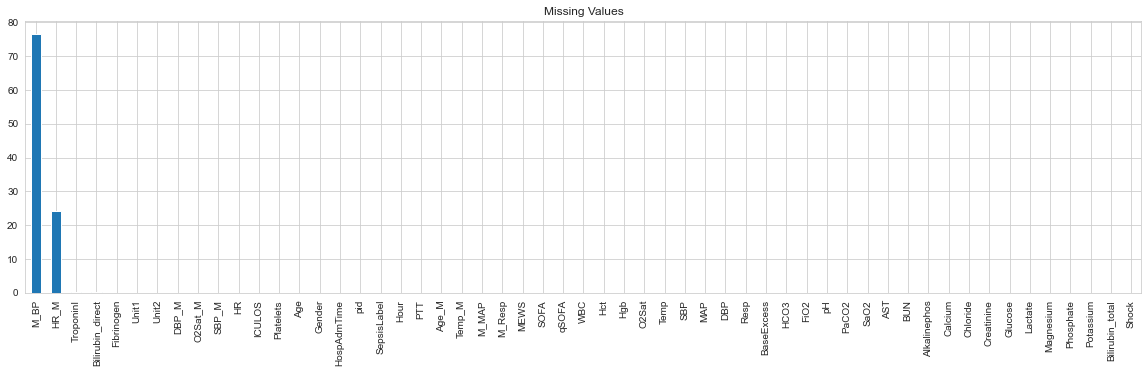

Columns with less than 90% missing values:  ['M_BP', 'HR_M', 'TroponinI', 'Bilirubin_direct', 'Fibrinogen', 'Unit1', 'Unit2', 'DBP_M', 'O2Sat_M', 'SBP_M', 'HR', 'ICULOS', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'pid', 'SepsisLabel', 'Hour', 'PTT', 'Age_M', 'Temp_M', 'M_MAP', 'M_Resp', 'MEWS', 'SOFA', 'qSOFA', 'WBC', 'Hct', 'Hgb', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'Shock'] 

 No of columns with less than 90% missing values:  55



In [58]:
Column_A1 = missing_values_report(df_raw_imputed_A_1)

Your selected dataframe has 55 columns.
There are 17 columns that have missing values.


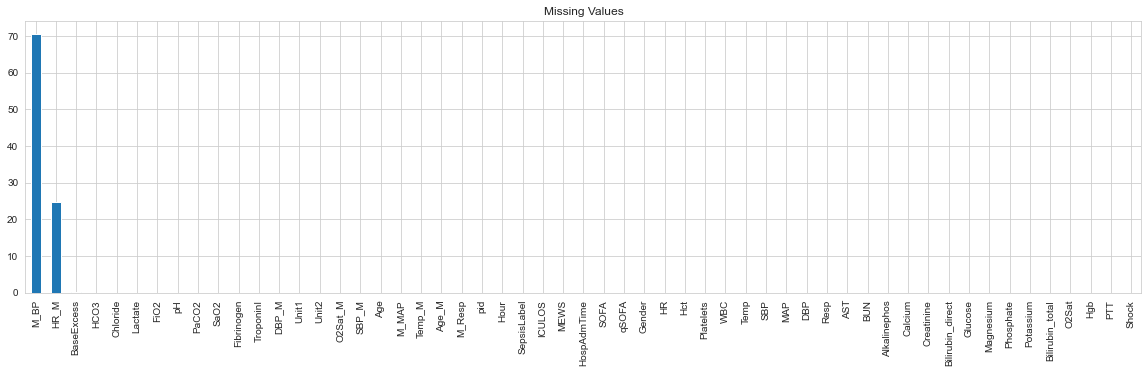

Columns with less than 90% missing values:  ['M_BP', 'HR_M', 'BaseExcess', 'HCO3', 'Chloride', 'Lactate', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'Fibrinogen', 'TroponinI', 'DBP_M', 'Unit1', 'Unit2', 'O2Sat_M', 'SBP_M', 'Age', 'M_MAP', 'Temp_M', 'Age_M', 'M_Resp', 'pid', 'Hour', 'SepsisLabel', 'ICULOS', 'MEWS', 'HospAdmTime', 'SOFA', 'qSOFA', 'Gender', 'HR', 'Hct', 'Platelets', 'WBC', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'O2Sat', 'Hgb', 'PTT', 'Shock'] 

 No of columns with less than 90% missing values:  55



In [59]:
Column_B1 = missing_values_report(df_raw_imputed_B_1)

In [60]:
df_raw_imputed_A_2 = Impute_interpolation(df_raw_A)
df_raw_imputed_B_2 = Impute_interpolation(df_raw_B)

Your selected dataframe has 44 columns.
There are 37 columns that have missing values.


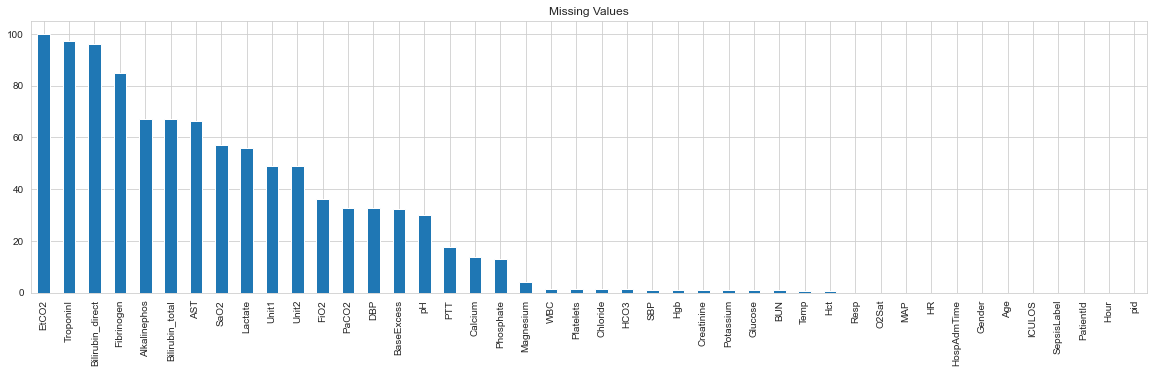

Columns with less than 90% missing values:  ['Fibrinogen', 'Alkalinephos', 'Bilirubin_total', 'AST', 'SaO2', 'Lactate', 'Unit1', 'Unit2', 'FiO2', 'PaCO2', 'DBP', 'BaseExcess', 'pH', 'PTT', 'Calcium', 'Phosphate', 'Magnesium', 'WBC', 'Platelets', 'Chloride', 'HCO3', 'SBP', 'Hgb', 'Creatinine', 'Potassium', 'Glucose', 'BUN', 'Temp', 'Hct', 'Resp', 'O2Sat', 'MAP', 'HR', 'HospAdmTime', 'Gender', 'Age', 'ICULOS', 'SepsisLabel', 'PatientId', 'Hour', 'pid'] 

 No of columns with less than 90% missing values:  41



In [61]:
Column_A2 = missing_values_report(df_raw_imputed_A_2)

Your selected dataframe has 44 columns.
There are 36 columns that have missing values.


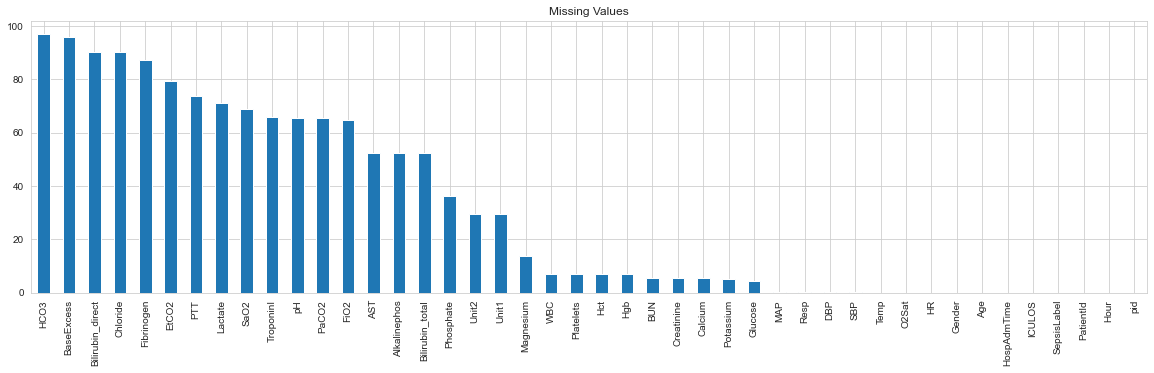

Columns with less than 90% missing values:  ['Fibrinogen', 'EtCO2', 'PTT', 'Lactate', 'SaO2', 'TroponinI', 'pH', 'PaCO2', 'FiO2', 'AST', 'Alkalinephos', 'Bilirubin_total', 'Phosphate', 'Unit2', 'Unit1', 'Magnesium', 'WBC', 'Platelets', 'Hct', 'Hgb', 'BUN', 'Creatinine', 'Calcium', 'Potassium', 'Glucose', 'MAP', 'Resp', 'DBP', 'SBP', 'Temp', 'O2Sat', 'HR', 'Gender', 'Age', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'PatientId', 'Hour', 'pid'] 

 No of columns with less than 90% missing values:  40



In [62]:
Column_B2 = missing_values_report(df_raw_imputed_B_2)

In [63]:
## remove PatientId as it is not a feature
df_raw_imputed_A_2.drop(['PatientId'], axis=1, inplace=True)
df_raw_imputed_B_2.drop(['PatientId'], axis=1, inplace=True)
## remove EtCO2 as it is 100 % missing
df_raw_imputed_A_2.drop(['EtCO2'], axis=1, inplace=True)
df_raw_imputed_B_2.drop(['EtCO2'], axis=1, inplace=True)

In [64]:
df_A_2 = features_eng(df_raw_imputed_A_2)
df_B_2 = features_eng(df_raw_imputed_B_2)

d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
d:\Installation\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  # Remove the CWD from sys.path while we load stuff.


In [65]:
df_A_2 = convert_cat_and_obj_to_num(df_A_2)
df_B_2 = convert_cat_and_obj_to_num(df_B_2)

Your selected dataframe has 55 columns.
There are 44 columns that have missing values.


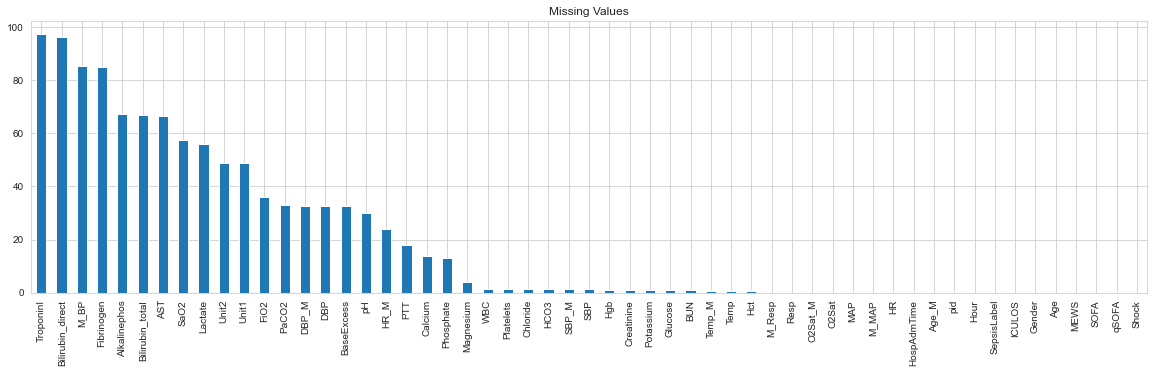

Columns with less than 90% missing values:  ['M_BP', 'Fibrinogen', 'Alkalinephos', 'Bilirubin_total', 'AST', 'SaO2', 'Lactate', 'Unit2', 'Unit1', 'FiO2', 'PaCO2', 'DBP_M', 'DBP', 'BaseExcess', 'pH', 'HR_M', 'PTT', 'Calcium', 'Phosphate', 'Magnesium', 'WBC', 'Platelets', 'Chloride', 'HCO3', 'SBP_M', 'SBP', 'Hgb', 'Creatinine', 'Potassium', 'Glucose', 'BUN', 'Temp_M', 'Temp', 'Hct', 'M_Resp', 'Resp', 'O2Sat_M', 'O2Sat', 'MAP', 'M_MAP', 'HR', 'HospAdmTime', 'Age_M', 'pid', 'Hour', 'SepsisLabel', 'ICULOS', 'Gender', 'Age', 'MEWS', 'SOFA', 'qSOFA', 'Shock'] 

 No of columns with less than 90% missing values:  53



In [66]:
Column_A2 = missing_values_report(df_A_2)

Your selected dataframe has 55 columns.
There are 43 columns that have missing values.


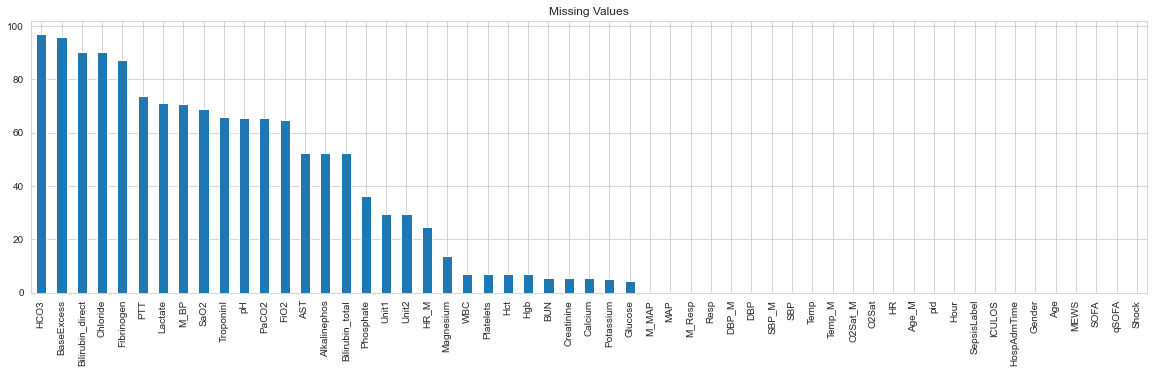

Columns with less than 90% missing values:  ['Fibrinogen', 'PTT', 'Lactate', 'M_BP', 'SaO2', 'TroponinI', 'pH', 'PaCO2', 'FiO2', 'AST', 'Alkalinephos', 'Bilirubin_total', 'Phosphate', 'Unit1', 'Unit2', 'HR_M', 'Magnesium', 'WBC', 'Platelets', 'Hct', 'Hgb', 'BUN', 'Creatinine', 'Calcium', 'Potassium', 'Glucose', 'M_MAP', 'MAP', 'M_Resp', 'Resp', 'DBP_M', 'DBP', 'SBP_M', 'SBP', 'Temp', 'Temp_M', 'O2Sat_M', 'O2Sat', 'HR', 'Age_M', 'pid', 'Hour', 'SepsisLabel', 'ICULOS', 'HospAdmTime', 'Gender', 'Age', 'MEWS', 'SOFA', 'qSOFA', 'Shock'] 

 No of columns with less than 90% missing values:  51



In [67]:
Column_B2 = missing_values_report(df_B_2)

Data frame without nan values

In [68]:
df_A1 = df_A_1.dropna()
df_B1 = df_B_1.dropna()
df_A2 = df_A_2.dropna()
df_B2 = df_B_2.dropna()

*********************************
DataFrame Shape:  (761995, 55)

*****************DataFrame Head****************
                          0          1          2          3          4
HR                    93.00      93.00      91.00      93.00      93.00
O2Sat                 92.50      92.50      96.00      98.00      95.00
Temp                  36.50      36.50      36.50      36.50      36.50
SBP                  110.00     110.00     108.00     123.00     110.00
MAP                   76.00      76.00      84.50      87.00      81.00
DBP                   56.00      56.00      72.00      61.00      70.00
Resp                  22.00      22.00      23.50      21.00      20.00
BaseExcess              NaN        NaN        NaN        NaN        NaN
HCO3                    NaN        NaN        NaN        NaN        NaN
FiO2                    NaN        NaN        NaN        NaN        NaN
pH                      NaN        NaN        NaN        NaN        NaN
PaCO2                 

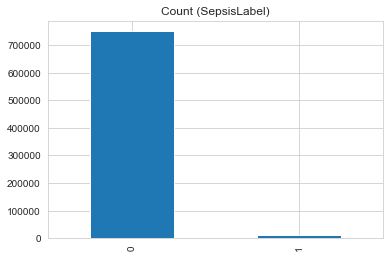

*****************Missing *****************
Your selected dataframe has 55 columns.
There are 43 columns that have missing values.


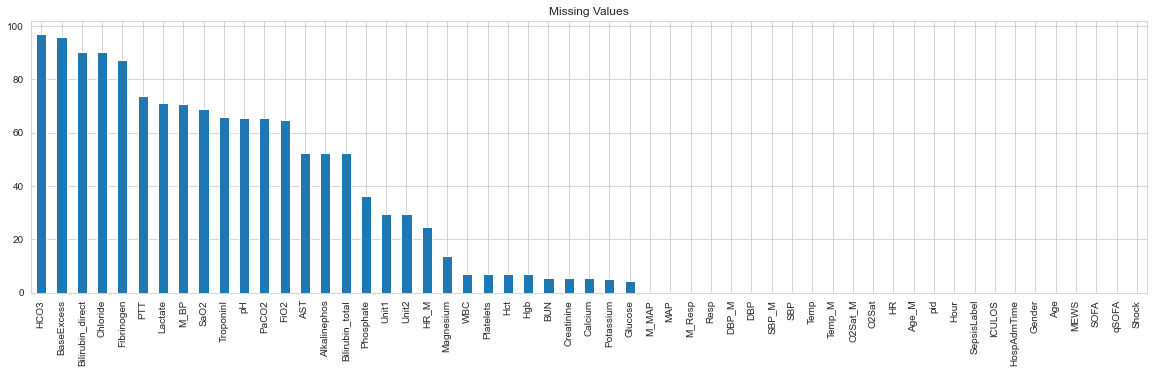

Columns with less than 90% missing values:  ['Fibrinogen', 'PTT', 'Lactate', 'M_BP', 'SaO2', 'TroponinI', 'pH', 'PaCO2', 'FiO2', 'AST', 'Alkalinephos', 'Bilirubin_total', 'Phosphate', 'Unit1', 'Unit2', 'HR_M', 'Magnesium', 'WBC', 'Platelets', 'Hct', 'Hgb', 'BUN', 'Creatinine', 'Calcium', 'Potassium', 'Glucose', 'M_MAP', 'MAP', 'M_Resp', 'Resp', 'DBP_M', 'DBP', 'SBP_M', 'SBP', 'Temp', 'Temp_M', 'O2Sat_M', 'O2Sat', 'HR', 'Age_M', 'pid', 'Hour', 'SepsisLabel', 'ICULOS', 'HospAdmTime', 'Gender', 'Age', 'MEWS', 'SOFA', 'qSOFA', 'Shock'] 

 No of columns with less than 90% missing values:  51

*****************Column Required for analysis *****************
Columns for feature engineering:  ['Platelets', 'Bilirubin_total', 'Creatinine']

*****************Concat both Col having with less than 90% missing values and Required Columns *****************
List of all columns Index(['Platelets', 'Bilirubin_total', 'Creatinine', 'Fibrinogen', 'PTT',
       'Lactate', 'M_BP', 'SaO2', 'TroponinI', 'pH',

In [69]:
Sel = EDA(df_B_2)
# EDA(df_B_1)
# EDA(df_A_2)
# EDA(df_B_2)

# Model Building

In [117]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [70]:
def upsample(df):
    from sklearn.utils import resample

    # Separate majority and minority classes
    df_majority = df[df.SepsisLabel==0]
    df_minority = df[df.SepsisLabel==1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority,
                                    replace=True,     # sample with replacement
                                    n_samples=len(df_majority),    # to match majority class
                                    random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    # Display new class counts
    print(df_upsampled.SepsisLabel.value_counts())
    
    return df_upsampled

In [71]:
def downsample(df):
    from sklearn.utils import resample

    # Separate majority and minority classes
    df_majority = df[df.SepsisLabel==0]
    df_minority = df[df.SepsisLabel==1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority),     # to match minority class
                                    random_state=123) # reproducible results

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])

    # Display new class counts
    print(df_downsampled.SepsisLabel.value_counts())
    
    return df_downsampled

sampling with NaN values

In [72]:
df_A_1_up = upsample(df_A_1)
df_B_1_up = upsample(df_B_1)
df_A_1_down = downsample(df_A_1)
df_B_1_down = downsample(df_B_1)

0    773079
1    773079
Name: SepsisLabel, dtype: int64
0    751215
1    751215
Name: SepsisLabel, dtype: int64
0    17136
1    17136
Name: SepsisLabel, dtype: int64
0    10780
1    10780
Name: SepsisLabel, dtype: int64


sampling without NaN values

In [73]:
df_A1_up = upsample(df_A1)
df_B1_up = upsample(df_B1)
df_A1_down = downsample(df_A1)
df_B1_down = downsample(df_B1)

0    128808
1    128808
Name: SepsisLabel, dtype: int64
0    157960
1    157960
Name: SepsisLabel, dtype: int64
0    2555
1    2555
Name: SepsisLabel, dtype: int64
0    1700
1    1700
Name: SepsisLabel, dtype: int64


sampling without NaN values

In [74]:
df_A2_up = upsample(df_A2)
df_B2_up = upsample(df_B2)
df_A2_down = downsample(df_A2)
df_B2_down = downsample(df_B2)

Series([], Name: SepsisLabel, dtype: int64)
0    140
1    140
Name: SepsisLabel, dtype: int64
Series([], Name: SepsisLabel, dtype: int64)
0    8
1    8
Name: SepsisLabel, dtype: int64


sampling with NaN values

In [75]:
df_A_2_up = upsample(df_A_2)
df_B_2_up = upsample(df_B_2)
df_A_2_down = downsample(df_A_2)
df_B_2_down = downsample(df_B_2)

0    773079
1    773079
Name: SepsisLabel, dtype: int64
0    751215
1    751215
Name: SepsisLabel, dtype: int64
0    17136
1    17136
Name: SepsisLabel, dtype: int64
0    10780
1    10780
Name: SepsisLabel, dtype: int64


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
def split_train_test(df):
  # Putting feature variables into X
  X = df.drop(['SepsisLabel'], axis=1)
  # Putting target variable to y
  y = df['SepsisLabel']
  # Splitting data into train and test set 80:20
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

  return X_train, X_test, y_train, y_test

## Method 1 : XGBoost (Fwd and Bwd imputation)

In [78]:
def Model_XGBoost (X_train, X_test, y_train, y_test):
  # Instantiate the XGBClassifier: xg_cl
  xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

  # Fit the classifier to the training set
  xg_cl.fit(X_train, y_train)

  # Predict the labels of the test set: preds
  preds = xg_cl.predict(X_test)

  # Compute the accuracy: accuracy
  accuracy = accuracy_score(y_test, preds)
  print("Accuracy: %f" % (accuracy))

  # Print the confusion matrix
  print(classification_report(y_test, preds))

  return xg_cl

#### Model_XGBoost With Down sample without NaN values

In [79]:
xg_model = Model_XGBoost(*split_train_test(df_A1_down))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B1_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_down['SepsisLabel']
predictions = xg_model.predict(XB)
predictions
print("Accuracy of Model::",accuracy_score(yB,predictions))
R1_XGB_down = classification_report(yB, predictions,output_dict=True)
R1_XGB_down = pd.DataFrame(R1_XGB_down).transpose()
print(R1_XGB_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.830724
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       518
           1       0.84      0.81      0.83       504

    accuracy                           0.83      1022
   macro avg       0.83      0.83      0.83      1022
weighted avg       0.83      0.83      0.83      1022

******** Test Set A Results printed ******** 

Accuracy of Model:: 0.6435294117647059
              precision    recall  f1-score      support
0              0.596139  0.890000  0.714016  1700.000000
1              0.783063  0.397059  0.526932  1700.000000
accuracy       0.643529  0.643529  0.643529     0.643529
macro avg      0.689601  0.643529  0.620474  3400.000000
weighted avg   0.689601  0.643529  0.620474  3400.000000
******** Test Set B Results printed ******** 



#### Model_XGBoost With Down sample with NaN values

In [80]:
xg_model = Model_XGBoost(*split_train_test(df_A_1_down))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B_1_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_1_down['SepsisLabel']
predictions = xg_model.predict(XB)
predictions
print("Accuracy of Model::",accuracy_score(yB,predictions))
R_1_XGB_down = classification_report(yB, predictions,output_dict=True)
R_1_XGB_down = pd.DataFrame(R_1_XGB_down).transpose()
print(R_1_XGB_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.772137
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      3444
           1       0.80      0.72      0.76      3411

    accuracy                           0.77      6855
   macro avg       0.77      0.77      0.77      6855
weighted avg       0.77      0.77      0.77      6855

******** Test Set A Results printed ******** 

Accuracy of Model:: 0.6886363636363636
              precision    recall  f1-score       support
0              0.639043  0.866976  0.735761  10780.000000
1              0.793223  0.510297  0.621056  10780.000000
accuracy       0.688636  0.688636  0.688636      0.688636
macro avg      0.716133  0.688636  0.678408  21560.000000
weighted avg   0.716133  0.688636  0.678408  21560.000000
******** Test Set B Results printed ******** 



#### Model_XGBoost With Up sample without NaN values

In [81]:
xg_model = Model_XGBoost(*split_train_test(df_A1_up))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B1_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_up['SepsisLabel']
predictions = xg_model.predict(XB)
predictions
print("Accuracy of Model::",accuracy_score(yB,predictions))
R1_XGB_up = classification_report(yB, predictions,output_dict=True)
R1_XGB_up = pd.DataFrame(R1_XGB_up).transpose()
print(R1_XGB_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.867110
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     25865
           1       0.89      0.84      0.86     25659

    accuracy                           0.87     51524
   macro avg       0.87      0.87      0.87     51524
weighted avg       0.87      0.87      0.87     51524

******** Test Set A Results printed ******** 

Accuracy of Model:: 0.6034502405672322
              precision    recall  f1-score       support
0              0.564773  0.902013  0.694624  157960.00000
1              0.756781  0.304887  0.434661  157960.00000
accuracy       0.603450  0.603450  0.603450       0.60345
macro avg      0.660777  0.603450  0.564643  315920.00000
weighted avg   0.660777  0.603450  0.564643  315920.00000
******** Test Set B Results printed ******** 



#### Model_XGBoost With Up sample with NaN values

In [120]:
xg_model = Model_XGBoost(*split_train_test(df_A_1_up))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B_1_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_1_up['SepsisLabel']
predictions = xg_model.predict(XB)
predictions
print("Accuracy of Model::",accuracy_score(yB,predictions))
R_1_XGB_up = classification_report(yB, predictions,output_dict=True)
R_1_XGB_up = pd.DataFrame(R_1_XGB_up).transpose()
print(R_1_XGB_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.784783
              precision    recall  f1-score   support

           0       0.76      0.84      0.80    154756
           1       0.82      0.73      0.77    154476

    accuracy                           0.78    309232
   macro avg       0.79      0.78      0.78    309232
weighted avg       0.79      0.78      0.78    309232

******** Test Set A Results printed ******** 

Accuracy of Model:: 0.6697290389568898
              precision    recall  f1-score       support
0              0.619127  0.882114  0.727586  7.512150e+05
1              0.795063  0.457344  0.580670  7.512150e+05
accuracy       0.669729  0.669729  0.669729  6.697290e-01
macro avg      0.707095  0.669729  0.654128  1.502430e+06
weighted avg   0.707095  0.669729  0.654128  1.502430e+06
******** Test Set B Results printed ******** 



#### Model_XGBoost With Up sample with NaN values for Interpolation imputation

In [83]:
xg_model = Model_XGBoost(*split_train_test(df_A_2_up))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B_2_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_2_up['SepsisLabel']
predictions = xg_model.predict(XB)
predictions
print("Accuracy of Model::",accuracy_score(yB,predictions))
RI_2_XGB_up = classification_report(yB, predictions,output_dict=True)
RI_2_XGB_up = pd.DataFrame(RI_2_XGB_up).transpose()
print(RI_2_XGB_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.813988
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    154756
           1       0.83      0.79      0.81    154476

    accuracy                           0.81    309232
   macro avg       0.81      0.81      0.81    309232
weighted avg       0.81      0.81      0.81    309232

******** Test Set A Results printed ******** 

Accuracy of Model:: 0.6852498951698249
              precision    recall  f1-score       support
0              0.643773  0.829492  0.724927  7.512150e+05
1              0.760360  0.541008  0.632197  7.512150e+05
accuracy       0.685250  0.685250  0.685250  6.852499e-01
macro avg      0.702067  0.685250  0.678562  1.502430e+06
weighted avg   0.702067  0.685250  0.678562  1.502430e+06
******** Test Set B Results printed ******** 



#### Model_XGBoost With down sample with NaN values for Interpolation imputation

In [84]:
xg_model = Model_XGBoost(*split_train_test(df_A_2_down))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B_2_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_2_down['SepsisLabel']
predictions = xg_model.predict(XB)
predictions
print("Accuracy of Model::",accuracy_score(yB,predictions))
RI_2_XGB_down = classification_report(yB, predictions,output_dict=True)
RI_2_XGB_down = pd.DataFrame(RI_2_XGB_down).transpose()
print(RI_2_XGB_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.807877
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      3444
           1       0.82      0.78      0.80      3411

    accuracy                           0.81      6855
   macro avg       0.81      0.81      0.81      6855
weighted avg       0.81      0.81      0.81      6855

******** Test Set A Results printed ******** 

Accuracy of Model:: 0.6968460111317254
              precision    recall  f1-score       support
0              0.662208  0.803618  0.726092  10780.000000
1              0.750295  0.590074  0.660609  10780.000000
accuracy       0.696846  0.696846  0.696846      0.696846
macro avg      0.706251  0.696846  0.693350  21560.000000
weighted avg   0.706251  0.696846  0.693350  21560.000000
******** Test Set B Results printed ******** 



## Method 2 : LGBM

In [85]:
def Model_LGBM (X_train, X_test, y_train, y_test):
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
    params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 30,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
    }

    model = lgb.train(params, lgb_train, num_boost_round=20, valid_sets=[lgb_train, lgb_test])
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_class = [int(i>0.5) for i in y_pred]

    accuracy = accuracy_score(y_test, y_pred_class)
    print("Accuracy: %f" % (accuracy))

    # Print the confusion matrix
    print(classification_report(y_test, y_pred_class))

    return model


### Model LGBM with Down sample with Fwd and Bwd 

In [86]:
lgbm_model = Model_LGBM(*split_train_test(df_A1_down))
print('******** Test Set A Results  printed ******** ', end='\n\n')
XB = df_B1_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_down['SepsisLabel']
y_pred = lgbm_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
R1_LGBM_down = classification_report(yB, y_pred_class,output_dict=True)
R1_LGBM_down = pd.DataFrame(R1_LGBM_down).transpose()
print(R1_LGBM_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5294
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 53
[LightGBM] [Info] Start training from score 0.501712
[1]	training's rmse: 0.482853	valid_1's rmse: 0.484779
[2]	training's rmse: 0.468518	valid_1's rmse: 0.473476
[3]	training's rmse: 0.454791	valid_1's rmse: 0.463016
[4]	training's rmse: 0.442381	valid_1's rmse: 0.451779
[5]	training's rmse: 0.431676	valid_1's rmse: 0.443927
[6]	training's rmse: 0.42177	valid_1's rmse: 0.437385
[7]	training's rmse: 0.41273	valid_1's rmse: 0.431108
[8]	training's rmse: 0.404452	valid_1's rmse: 0.425798
[9]	training's rmse: 0.397282	valid_1's rmse: 0.42086
[10]	training's rmse: 0.390638	valid_1's rmse: 0.415876
[11]	training's rmse: 0.384191	valid_1's rmse: 0.411857
[12]	training's rmse: 0.378624	valid_1's rmse: 0.407

### Model LGBM with up sample with fwd and bwd imputation

In [87]:
lgbm_model = Model_LGBM(*split_train_test(df_A1_up))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B1_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_up['SepsisLabel']
y_pred = lgbm_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
R1_LGBM_up = classification_report(yB, y_pred_class,output_dict=True)
R1_LGBM_up = pd.DataFrame(R1_LGBM_up).transpose()
print(R1_LGBM_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6606
[LightGBM] [Info] Number of data points in the train set: 206092, number of used features: 53
[LightGBM] [Info] Start training from score 0.500500
[1]	training's rmse: 0.484067	valid_1's rmse: 0.484218
[2]	training's rmse: 0.470545	valid_1's rmse: 0.470868
[3]	training's rmse: 0.45814	valid_1's rmse: 0.458651
[4]	training's rmse: 0.446906	valid_1's rmse: 0.447501
[5]	training's rmse: 0.437004	valid_1's rmse: 0.437562
[6]	training's rmse: 0.428156	valid_1's rmse: 0.428694
[7]	training's rmse: 0.420396	valid_1's rmse: 0.420992
[8]	training's rmse: 0.412743	valid_1's rmse: 0.413409
[9]	training's rmse: 0.40572	valid_1's rmse: 0.406282
[10]	training's rmse: 0.399214	valid_1's rmse: 0.399808
[11]	training's rmse: 0.393993	valid_1's rmse: 0.394661
[12]	training's rmse: 0.388351	valid_1's rmse: 0.

### Model LGBM with up sample with interpolation imputation

In [121]:
lgbm_model = Model_LGBM(*split_train_test(df_A_2_up))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B_2_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_1_up['SepsisLabel']
y_pred = lgbm_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
RI_2_LGBM_up = classification_report(yB, y_pred_class,output_dict=True)
RI_2_LGBM_up = pd.DataFrame(RI_2_LGBM_up).transpose()
print(RI_2_LGBM_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.539556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9436
[LightGBM] [Info] Number of data points in the train set: 1236926, number of used features: 54
[LightGBM] [Info] Start training from score 0.500113
[1]	training's rmse: 0.484134	valid_1's rmse: 0.484145
[2]	training's rmse: 0.469992	valid_1's rmse: 0.470031
[3]	training's rmse: 0.458562	valid_1's rmse: 0.458607
[4]	training's rmse: 0.448517	valid_1's rmse: 0.44853
[5]	training's rmse: 0.440134	valid_1's rmse: 0.440186
[6]	training's rmse: 0.43226	valid_1's rmse: 0.432368
[7]	training's rmse: 0.425654	valid_1's rmse: 0.42572
[8]	training's rmse: 0.419954	valid_1's rmse: 0.420015
[9]	training's rmse: 0.414784	valid_1's rmse: 0.414835
[10]	training's rmse: 0.410422	valid_1's rmse: 0.410488
[11]	training's rmse: 0.406297	valid_1's rmse: 0.406402
[12]	training's rmse: 0.402653	valid_1's rmse: 0.

### Model LGBM with down sample with interpolation imputation

In [89]:
lgbm_model = Model_LGBM(*split_train_test(df_A_2_down))
print('******** Test Set A Results printed ******** ', end='\n\n')
XB = df_B_2_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_2_down['SepsisLabel']
y_pred = lgbm_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
RI_2_LGBM_down = classification_report(yB, y_pred_class,output_dict=True)
RI_2_LGBM_down = pd.DataFrame(RI_2_LGBM_down).transpose()
print(RI_2_LGBM_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9075
[LightGBM] [Info] Number of data points in the train set: 27417, number of used features: 54
[LightGBM] [Info] Start training from score 0.500602
[1]	training's rmse: 0.483715	valid_1's rmse: 0.484025
[2]	training's rmse: 0.469421	valid_1's rmse: 0.470147
[3]	training's rmse: 0.457479	valid_1's rmse: 0.45868
[4]	training's rmse: 0.446953	valid_1's rmse: 0.448748
[5]	training's rmse: 0.438303	valid_1's rmse: 0.440551
[6]	training's rmse: 0.429985	valid_1's rmse: 0.432646
[7]	training's rmse: 0.423091	valid_1's rmse: 0.426108
[8]	training's rmse: 0.417145	valid_1's rmse: 0.420394
[9]	training's rmse: 0.411458	valid_1's rmse: 0.41492
[10]	training's rmse: 0.406843	valid_1's rmse: 0.410983
[11]	training's rmse: 0.402569	valid_1's rmse: 0.407311
[12]	training's rmse: 0.398646	valid_1's rmse: 0.4

## Method 3: ExtraTreesClassifier

In [90]:
def Model_ExtraTrees(X_train, X_test, y_train, y_test):
    etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
    # Train the model
    etc.fit(X_train, y_train)

    # Predict on the test set
    y_pred = etc.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    # Generate the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    return etc

#### Model Extra trees with down sample

In [91]:
etc_model = Model_ExtraTrees(*split_train_test(df_A1_down))
print('******** Test Set A Results  printed ******** ', end='\n\n')
XB = df_B1_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_down['SepsisLabel']
y_pred = etc_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
R1_ETC_down = classification_report(yB, y_pred_class,output_dict=True)
R1_ETC_down = pd.DataFrame(R1_ETC_down).transpose()
print(R1_ETC_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.913894324853229
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       518
           1       0.92      0.90      0.91       504

    accuracy                           0.91      1022
   macro avg       0.91      0.91      0.91      1022
weighted avg       0.91      0.91      0.91      1022

******** Test Set A Results  printed ******** 

Accuracy of Model:: 0.6226470588235294
              precision    recall  f1-score      support
0              0.574758  0.942941  0.714190  1700.000000
1              0.841244  0.302353  0.444829  1700.000000
accuracy       0.622647  0.622647  0.622647     0.622647
macro avg      0.708001  0.622647  0.579510  3400.000000
weighted avg   0.708001  0.622647  0.579510  3400.000000
******** Test Set B Results printed ******** 



### Model Extra trees with up sample

In [92]:
etc_model = Model_ExtraTrees(*split_train_test(df_A1_up))
print('******** Test Set A Results  printed ******** ', end='\n\n')
XB = df_B1_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_up['SepsisLabel']
y_pred = etc_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
R1_ETC_up = classification_report(yB, y_pred_class,output_dict=True)
R1_ETC_up = pd.DataFrame(R1_ETC_up).transpose()
print(R1_ETC_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

Accuracy: 0.9995536060864839
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25865
           1       1.00      1.00      1.00     25659

    accuracy                           1.00     51524
   macro avg       1.00      1.00      1.00     51524
weighted avg       1.00      1.00      1.00     51524

******** Test Set A Results  printed ******** 

Accuracy of Model:: 0.5


d:\Installation\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Installation\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision  recall  f1-score   support
0                  0.50     1.0  0.666667  157960.0
1                  0.00     0.0  0.000000  157960.0
accuracy           0.50     0.5  0.500000       0.5
macro avg          0.25     0.5  0.333333  315920.0
weighted avg       0.25     0.5  0.333333  315920.0
******** Test Set B Results printed ******** 



d:\Installation\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Method 4: RandomForestClassifier

In [93]:
def Model_RandForest (X_train, X_test, y_train, y_test):
    classifier = RandomForestClassifier(n_estimators = 50, criterion='gini', random_state=0, max_depth=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    result = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, y_pred)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test,y_pred)
    print("Accuracy:",result2)
    
    return classifier

### Model Random forest with down sample

In [94]:
RFC_model = Model_RandForest(*split_train_test(df_A1_down))
print('******** Test Set A Results  printed ******** ', end='\n\n')
XB = df_B1_down.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_down['SepsisLabel']
y_pred = RFC_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
R1_RFC_down = classification_report(yB, y_pred_class,output_dict=True)
R1_RFC_down = pd.DataFrame(R1_RFC_down).transpose()
print(R1_RFC_down)
print('******** Test Set B Results printed ******** ', end='\n\n')

Confusion Matrix:
[[420  98]
 [198 306]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       518
           1       0.76      0.61      0.67       504

    accuracy                           0.71      1022
   macro avg       0.72      0.71      0.71      1022
weighted avg       0.72      0.71      0.71      1022

Accuracy: 0.7103718199608611
******** Test Set A Results  printed ******** 

Accuracy of Model:: 0.6641176470588235
              precision    recall  f1-score      support
0              0.619845  0.848824  0.716485  1700.000000
1              0.760261  0.479412  0.588023  1700.000000
accuracy       0.664118  0.664118  0.664118     0.664118
macro avg      0.690053  0.664118  0.652254  3400.000000
weighted avg   0.690053  0.664118  0.652254  3400.000000
******** Test Set B Results printed ******** 



### Model Random forest with up sample

In [95]:
RFC_model = Model_RandForest(*split_train_test(df_A1_up))
print('******** Test Set A Results  printed ******** ', end='\n\n')
XB = df_B1_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B1_up['SepsisLabel']
y_pred = RFC_model.predict(XB)
y_pred_class = [int(i>0.5) for i in y_pred]

print("Accuracy of Model::",accuracy_score(yB,y_pred_class))
R1_RFC_up = classification_report(yB, y_pred_class,output_dict=True)
R1_RFC_up = pd.DataFrame(R1_RFC_up).transpose()
print(R1_RFC_up)
print('******** Test Set B Results printed ******** ', end='\n\n')

Confusion Matrix:
[[21110  4755]
 [10350 15309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74     25865
           1       0.76      0.60      0.67     25659

    accuracy                           0.71     51524
   macro avg       0.72      0.71      0.70     51524
weighted avg       0.72      0.71      0.70     51524

Accuracy: 0.706835649406102
******** Test Set A Results  printed ******** 

Accuracy of Model:: 0.6561787794378323
              precision    recall  f1-score        support
0              0.616933  0.823993  0.705586  157960.000000
1              0.735078  0.488364  0.586845  157960.000000
accuracy       0.656179  0.656179  0.656179       0.656179
macro avg      0.676005  0.656179  0.646216  315920.000000
weighted avg   0.676005  0.656179  0.646216  315920.000000
******** Test Set B Results printed ******** 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


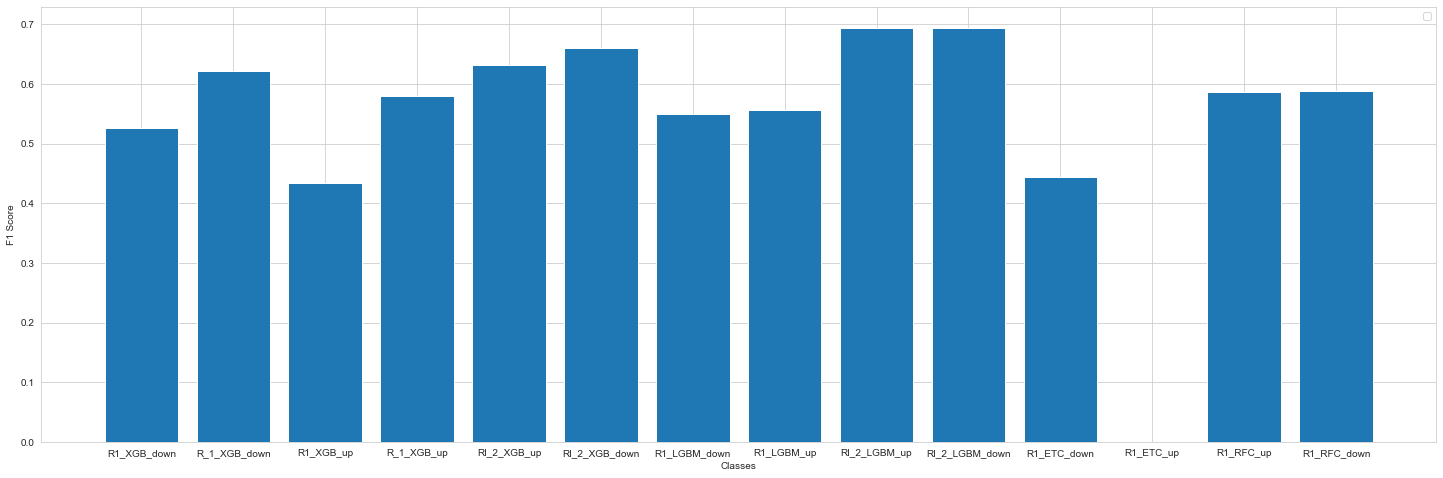

In [104]:
f1_scores1 = R1_XGB_down.iloc[1]['f1-score']
f1_scores2 = R_1_XGB_down.iloc[1]['f1-score']
f1_scores3 = R1_XGB_up.iloc[1]['f1-score']
f1_scores4 = R_1_XGB_up.iloc[1]['f1-score']
f1_scores5 = RI_2_XGB_up.iloc[1]['f1-score']
f1_scores6 = RI_2_XGB_down.iloc[1]['f1-score']
f1_scores7 = R1_LGBM_down.iloc[1]['f1-score']
f1_scores8 = R1_LGBM_up.iloc[1]['f1-score']
f1_scores9 = RI_2_LGBM_up.iloc[1]['f1-score']
f1_scores10 = RI_2_LGBM_down.iloc[1]['f1-score']
f1_scores11 = R1_ETC_down.iloc[1]['f1-score']
f1_scores12 = R1_ETC_up.iloc[1]['f1-score']
f1_scores13 = R1_RFC_up.iloc[1]['f1-score']
f1_scores14 = R1_RFC_down.iloc[1]['f1-score']

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(25, 8))

# Plot the f1 scores for each model in the corresponding subplot
ax.bar(['R1_XGB_down', 'R_1_XGB_down','R1_XGB_up', 'R_1_XGB_up','RI_2_XGB_up', 'RI_2_XGB_down','R1_LGBM_down', 'R1_LGBM_up','RI_2_LGBM_up', 'RI_2_LGBM_down','R1_ETC_down', 'R1_ETC_up','R1_RFC_up', 'R1_RFC_down'],
([f1_scores1, f1_scores2,f1_scores3,f1_scores4,f1_scores5,f1_scores6,f1_scores7,f1_scores8, f1_scores9,f1_scores10,f1_scores11,f1_scores12,f1_scores13,f1_scores14]))


# Add titles and labels to the subplots
ax.legend()
ax.set_xlabel('Classes')
ax.set_ylabel('F1 Score')

# Show the plot
plt.show()

In [137]:
def plot_roc(labels, probas, name='', ax=None):
    """ Basic roc plot """
    # Get the curve vals
    fpr, tpr, thresholds = roc_curve(labels, probas)

    # Plot curve
    auc = roc_auc_score(labels, probas)
    ax.plot(fpr, tpr, lw=2, alpha=1, label='{} auc: {:.3f}'.format(name.title(), auc))

    ax.legend(loc='lower right')

In [138]:
def plot_roc_curves(labels, probas, name='', ax=None):
    """
    Sets up an roc plot and returns the ax object
    """
    # Setup axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 10))

    plot_roc(labels, probas, name=name, ax=ax)

    # Plot chance
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', alpha=.8)

    # Fill bottom right
    ax.fill_between([0, 1], [0, 1], alpha=0.3, color='black')

    # Settings
    ax.set_xlabel('False Positive Rate or (1 - Specifity)', fontsize=15)
    ax.set_ylabel('True Positive Rate or (Sensitivity)', fontsize=15)
    ax.set_title('Receiver Operating Characteristic', weight='bold', fontsize=18)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.legend(loc='lower right')

    return ax

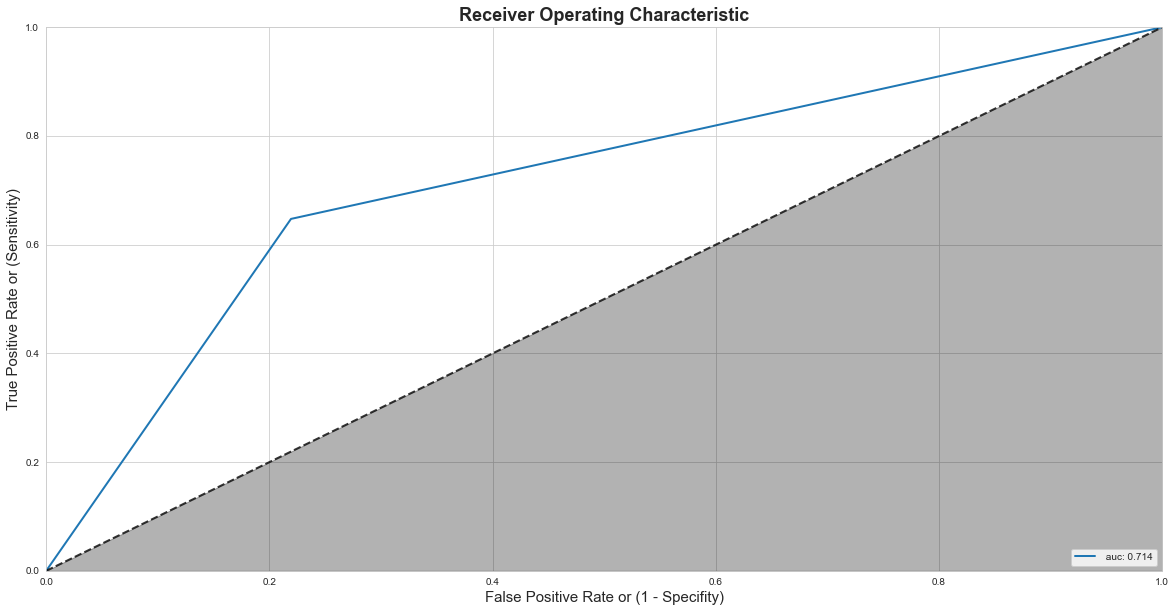

In [139]:
XB = df_B_2_up.drop(['SepsisLabel'], axis=1)
# Putting target variable to y
yB = df_B_1_up['SepsisLabel']
y_pred = lgbm_model.predict(XB)
y_pred_class = pd.Series([int(i>0.5) for i in y_pred])

ab = plot_roc_curves(yB,y_pred_class)

# Conclusion 

From the above graph, we can see that there are two models that fits in our dataset well.<br> <br>
One model is having recall of 64.73% and f1 score of 69.35% for up sampling using LGBM model with Interpolation Imputation and another model is having recall of 65.43% and f1 score of 69.45% for down sampling using LGBM model with Interpolation Imputation. But, we will prioritize to use the model with upsampling because it has higher number of samples. So, it is more precise. <br><br>
Here, the recall value of 69.35% means that we can succesfully identify almost 7 patients out of 10 that will develop a sepsis within the next 6 hours after the laboratory analyses were performed. So, before 6 hours, precautions can be taken and the treatment can be applied accordingly by the doctor. So, we have a good model that can predict sepsis in the patients.